1-data.describe()
2-model
3-fit
4-predict
5-evaluate
6-accuracy


In [1]:
import pandas as pd

In [6]:
data=pd.read_csv(r"C:\Users\Adarsh Kumar\Desktop\Academics\kaggle notes\data\titanic.csv")

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
y=data["Survived"]

In [9]:
data=data.drop(["Survived"],axis=1)

In [10]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
# Impute values collectively in a datstet
from sklearn.impute import SimpleImputer
import numpy as np

In [12]:
si=SimpleImputer(missing_values=np.nan,strategy="mean")   # impute all nan values in data once
datan=pd.DataFrame(si.fit_transform(data.select_dtypes(exclude=["object"])),columns=data.select_dtypes(exclude=(["object"])).columns)

In [13]:
datan.isnull().sum().sum()

0

In [14]:
# catregorical encoding to numeriacl valyes
from sklearn.preprocessing import LabelEncoder  
data1=data.copy()

In [15]:
# categorical encoding
data2=data.select_dtypes(include=["object"])
col2=data2.columns
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder(handle_unknown="ignore",sparse=False)
data3=pd.DataFrame(oe.fit_transform(data2))
data3

,0,1,2,3,4,5,6,7,8,9,...,853,854,855,856,857,858,859,860,861,862
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
from sklearn.preprocessing import OrdinalEncoder  # same as LabelEncoder
#oe=OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=np.nan)
#oe.fit_transform(data.select_dtypes(include=["object"]))

In [17]:
data2.isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       327
Embarked      0
dtype: int64

In [18]:
le=LabelEncoder()
data1["Embarked"]=le.fit_transform(data1["Embarked"])
data1["Embarked"].unique()

array([1, 2, 0])

In [19]:
data1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
data1.isnull().sum()[data1.isnull().sum()>0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [22]:
import numpy as np
import numpy as np
from scipy import stats
data1["Cabin"]=data1["Cabin"].fillna(stats.mode(data1["Cabin"])[0][0])

In [23]:
data1["Fare"]=data1["Fare"].replace(np.nan,np.mean(data1["Fare"]))

In [24]:
data1["Age"]=data1["Age"].replace(np.nan,np.mean(data1["Age"]))

In [25]:
data1["Sex"]=le.fit_transform(data1["Sex"])

In [26]:
data1["Ticket"]=le.fit_transform(data1["Ticket"])

In [27]:
data1["Cabin"]=le.fit_transform(data1["Cabin"])

In [28]:
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.50000,0,0,152,7.8292,15,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.00000,1,0,221,7.0000,15,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.00000,0,0,73,9.6875,15,1
3,895,3,"Wirz, Mr. Albert",1,27.00000,0,0,147,8.6625,15,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.00000,1,1,138,12.2875,15,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.27259,0,0,267,8.0500,15,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.00000,0,0,324,108.9000,22,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.50000,0,0,346,7.2500,15,2
416,1308,3,"Ware, Mr. Frederick",1,30.27259,0,0,220,8.0500,15,2


(array([8., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.        , 0.09692864, 0.19385727, 0.29078591, 0.38771454,
        0.48464318, 0.58157181, 0.67850045, 0.77542908, 0.87235772,
        0.96928636]),
 <BarContainer object of 10 artists>)

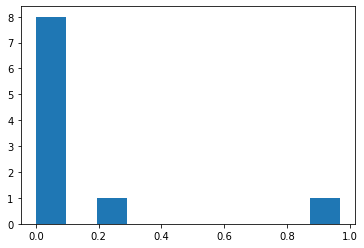

In [29]:
from sklearn.preprocessing import Normalizer  # it normalize data in columns 
ne=Normalizer(copy=False)
data2=ne.fit_transform(data1.select_dtypes(exclude=["object"]));
data3=pd.DataFrame(data2,columns=data1.select_dtypes(exclude=["object"]).columns)
t=data3.iloc[1,:]
import matplotlib. pyplot as  plt
plt.hist(t,bins=10) 

In [30]:
# standard scaler   # put dqta with zero mean and 1 variance.
from sklearn.preprocessing import StandardScaler   # it normalize data in row direction
se=StandardScaler(copy=False)
data4=pd.DataFrame(se.fit_transform(data1.select_dtypes(exclude=["object"])),columns=data1.select_dtypes(exclude=["object"]).columns)

In [31]:
from sklearn.preprocessing import MinMaxScaler # rescale vlaues in user min_max range

In [32]:
from sklearn.preprocessing import MinMaxScaler  # rescale data in range of feature_range(min,Max)
mx=MinMaxScaler(feature_range=(1,100))
pd.DataFrame(mx.fit_transform(data1.select_dtypes(exclude=["object"])),columns=data1.select_dtypes(exclude=["object"]).columns)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.00000,100.0,100.0,45.819596,1.000,1.0,42.569061,2.512876,20.80,50.5
1,1.23741,100.0,1.0,62.138995,13.375,1.0,61.439227,2.352646,20.80,100.0
2,1.47482,50.5,100.0,81.722274,1.000,1.0,20.964088,2.871965,20.80,50.5
3,1.71223,100.0,100.0,36.027957,1.000,1.0,41.201657,2.673899,20.80,100.0
4,1.94964,100.0,1.0,29.500198,13.375,12.0,38.740331,3.374377,20.80,100.0
...,...,...,...,...,...,...,...,...,...,...
413,99.05036,100.0,100.0,40.300494,1.000,1.0,74.019337,2.555543,20.80,100.0
414,99.28777,1.0,1.0,51.694580,1.000,1.0,89.607735,22.043306,30.04,1.0
415,99.52518,100.0,100.0,51.041804,1.000,1.0,95.624309,2.400955,20.80,100.0
416,99.76259,100.0,100.0,40.300494,1.000,1.0,61.165746,2.555543,20.80,100.0


In [33]:
# pipeline
from sklearn.pipeline import Pipeline
num_data=data.select_dtypes(exclude=["object"]).columns
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=np.nan,strategy="mean")
cat_data=data.select_dtypes(include=["object"]).columns
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [34]:
# pipeline formation for cat data 
cat_data_process=Pipeline(steps=[
    ("imputation",SimpleImputer(strategy="most_frequent")),
    ("LabelREncode",LabelEncoder())
])
#Pipeline formatio for num data
num_data_process=Pipeline(steps=[
    ("Imputer",SimpleImputer(strategy="mean"))
])
# column transformation                              # categorical columns ke liye cat_data transform karna aur numerical data ke liye num_data transform karna.
from sklearn.compose import ColumnTransformer
preprocess=ColumnTransformer(transformers=[
    ("numerical_data",num_data_process,list(num_data)),
    ("categorical_data",cat_data_process,list(cat_data))])
# 1- Impute values with most frequent
# 2- Encode categoriacl values with 
"""pipeline(steps=[(1-Imputer),(2-LabelEncoder)])"""


'pipeline(steps=[(1-Imputer),(2-LabelEncoder)])'

In [35]:
pwd

'C:\\Users\\Adarsh Kumar\\Desktop\\Academics\\kaggle notes\\ML practice'

In [36]:
#trainx,trainy
#preprocess.fit_transform(trainx,trainy)


In [61]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
project1=Pipeline(steps=[
    ("preprocess",preprocess),
    ("model",model)
])
from sklearn.model_selection import train_test_split
trainx,valx,trainy,valy=train_test_split(data1,y,train_size=0.8)
#project1.fit(data1.select_dtypes(exclude=["object"]),y)

In [39]:
# method 2 for pipeline fittig
from sklearn.linear_model import LinearRegression
le=LinearRegression()
project2=Pipeline(steps=[("model",le)])
project2.fit(data1.select_dtypes(exclude=["object"]),y)
pred2=project2.predict(data1.select_dtypes(exclude=["object"]))
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred2,y)

5.746599368610021e-15

In [40]:
# method-2
train=data1.loc[:,["Pclass","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]]

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
modelle=LogisticRegression()
trainx,valx,trainy,valy=train_test_split(train,y,train_size=0.9)

In [42]:
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
modelle.fit(trainx,trainy)

c:\users\adarsh kumar\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
pred=modelle.predict(valx)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,valy)

1.0

In [46]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred,valy)

0.0

In [47]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(trainx,trainy)

DecisionTreeClassifier()

In [48]:
pred2=model2.predict(valx)
pred2

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [49]:
accuracy_score(pred2,valy)

1.0

In [50]:
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor()
model3.fit(trainx,trainy)

DecisionTreeRegressor()

In [51]:
pred3=model3.predict(valx)

In [52]:
accuracy_score(pred3,valy)

1.0

In [53]:
pred3

array([0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0.])

In [54]:
def yamini(model,trainx=trainx,trainy=trainy,valx=valx,valy=valy):
    model.fit(trainx,trainy)
    pred=model.predict(valx)
    return accuracy_score(pred,valy)

In [55]:
yamini(model2)

1.0

In [56]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
yamini(model4)

1.0

In [57]:
from sklearn.ensemble import RandomForestRegressor
model5=RandomForestRegressor()
yamini(model5)

1.0

In [59]:

from sklearn.feature_selection import mutual_info_regression
mutual_info_regression(valx,pred3)

array([0.01124591, 0.67756767, 0.06321708, 0.02419243, 0.        ,
       0.        , 0.03940579, 0.24427036, 0.        ])